In [47]:
import pandas_gbq
from google.oauth2 import service_account
import os
# from google.cloud import bigquery
import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'rugged-baton-283921-5706f65c85fe.json'
credentials = service_account.Credentials.from_service_account_file('rugged-baton-283921-5706f65c85fe.json')

In [3]:
# bigquery_client = bigquery.Client()

In [4]:
# bigquery_client

In [5]:
# query='''
# SELECT *
# FROM `rugged-baton-283921.mots.vehicles_202101`
# WHERE (EXTRACT(YEAR FROM firstUsedDate)) > 1995
# AND EXTRACT(YEAR FROM firstUsedDate) < 2010
# ORDER BY rand()
# LIMIT 3000000;
# '''

In [6]:
# query_job = bigquery_client.query(query)

In [19]:
sql = """
WITH vehicles as (
    SELECT *
    FROM `rugged-baton-283921.mots.vehicles_202101`
    WHERE EXTRACT(YEAR from registrationDate) > 2005
    AND EXTRACT(YEAR from registrationDate) < 2007
    ORDER BY rand() 
    LIMIT 100
) SELECT *
FROM `rugged-baton-283921.mots.tests_202101` A
INNER JOIN vehicles B 
ON A.registration = B.registration
WHERE A.testResult = "PASSED";

"""

In [20]:
df = pandas_gbq.read_gbq(sql, project_id='rugged-baton-283921', credentials = credentials, progress_bar_type='tqdm')

Downloading: 100%|████████████████████████████████████████████████████████████████| 945/945 [00:01<00:00, 913.35rows/s]


In [156]:
df.head()

,completedDate,testResult,expiryDate,odometerValue,odometerUnit,motTestNumber,odometerResultType,registration,jsonPage,registration_1,...,model,firstUsedDate,registrationDate,manufactureDate,engineSize,fuelType,primaryColour,vehicleId,jsonPage_1,year_mot
0,2020-05-20 00:00:00+00:00,PASSED,2021-06-01 00:00:00+00:00,11061,mi,268695881711,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2020
1,2019-05-31 00:00:00+00:00,PASSED,2020-06-01 00:00:00+00:00,11004,mi,434764599544,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2019
2,2018-06-02 00:00:00+00:00,PASSED,2019-06-01 00:00:00+00:00,10746,mi,971414934877,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2018
3,2017-06-01 00:00:00+00:00,PASSED,2018-05-31 00:00:00+00:00,10361,mi,365652881626,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2017
4,2016-04-04 00:00:00+00:00,PASSED,2017-04-20 00:00:00+00:00,9823,mi,488587492324,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2016


In [158]:
#Checking to see whether firstUsedDate and registrationDate are always the same
(df['firstUsedDate'] == df['registrationDate']).unique()

array([ True])

In [22]:
#Generating a list of VRNs
unique_vrms = df['registration'].unique().tolist()

In [23]:
len(unique_vrms)

100

In [54]:
unique_vrms[45]

'YH56VGD'

In [57]:
df.drop(df[df['registration'] == 'FL56MHK'].index, inplace=True)

In [58]:
eg_df = df[df['registration'] == 'FL56MHK']
eg_df.head(30)

,completedDate,testResult,expiryDate,odometerValue,odometerUnit,motTestNumber,odometerResultType,registration,jsonPage,registration_1,make,model,firstUsedDate,registrationDate,manufactureDate,engineSize,fuelType,primaryColour,vehicleId,jsonPage_1


<AxesSubplot:xlabel='completedDate', ylabel='odometerValue'>

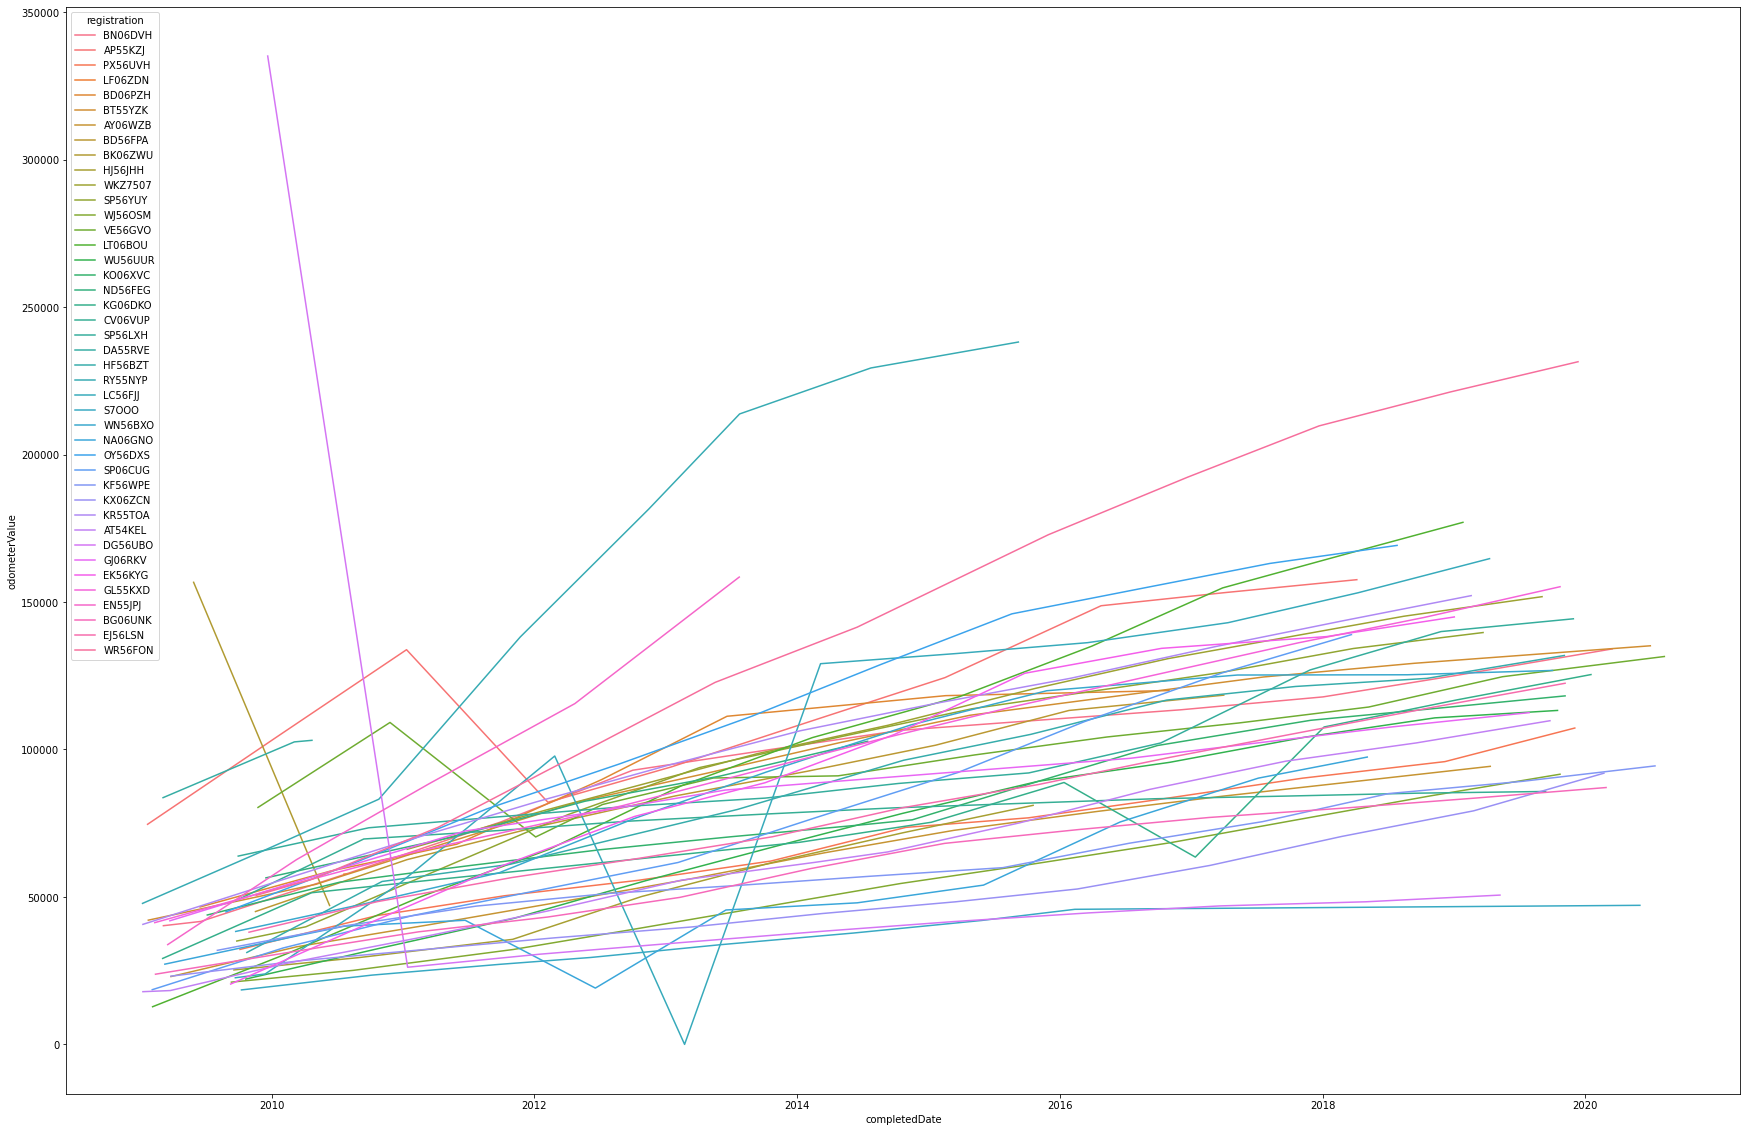

In [164]:
data = df[df['fuelType'] == 'Diesel']

plt.figure(figsize = (30, 20))
sns.lineplot(data = data, x = 'completedDate', y='odometerValue', hue='registration')


In [159]:
# first_year = df[df['completedDate'] < '2010']
# first_year.head()

In [70]:
df['year_mot'] = df['completedDate'].dt.year

In [71]:
df.head()

,completedDate,testResult,expiryDate,odometerValue,odometerUnit,motTestNumber,odometerResultType,registration,jsonPage,registration_1,...,model,firstUsedDate,registrationDate,manufactureDate,engineSize,fuelType,primaryColour,vehicleId,jsonPage_1,year_mot
0,2020-05-20 00:00:00+00:00,PASSED,2021-06-01 00:00:00+00:00,11061,mi,268695881711,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2020
1,2019-05-31 00:00:00+00:00,PASSED,2020-06-01 00:00:00+00:00,11004,mi,434764599544,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2019
2,2018-06-02 00:00:00+00:00,PASSED,2019-06-01 00:00:00+00:00,10746,mi,971414934877,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2018
3,2017-06-01 00:00:00+00:00,PASSED,2018-05-31 00:00:00+00:00,10361,mi,365652881626,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2017
4,2016-04-04 00:00:00+00:00,PASSED,2017-04-20 00:00:00+00:00,9823,mi,488587492324,READ,AY06DSZ,1425.json,AY06DSZ,...,FXDBI,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,2006-05-16 00:00:00+00:00,1449.0,Petrol,Black,Ju_97wWLpU1APuNg40Q09w==,1425.json,2016


In [84]:
registrations = []
for index, value in df.registration.iteritems():
    if value not in registrations:
        registrations.append(value)
    else:
        pass


In [85]:
registrations[:20]

['AY06DSZ',
 'PJ56RCF',
 'WG06HOJ',
 'BN06DVH',
 'SF56GWL',
 'AJ06YGO',
 'AP55KZJ',
 'DY56GUH',
 'SJ06ZWV',
 'PX56UVH',
 'LF06ZDN',
 'BD06PZH',
 'DV55YWW',
 'BT55YZK',
 'AY06WZB',
 'BT56GYE',
 'BD56FPA',
 'BK06ZWU',
 'VU06TTV',
 'HJ56JHH']

In [86]:
len(registrations)

99

How do we tell the difference between data that is monotonic and non-monotonic?

DY56GUH is an example of a dodgy odometerValue:

In [99]:
sample_non_monotonic = df[df['registration'] == 'DY56GUH']

<AxesSubplot:xlabel='completedDate', ylabel='odometerValue'>

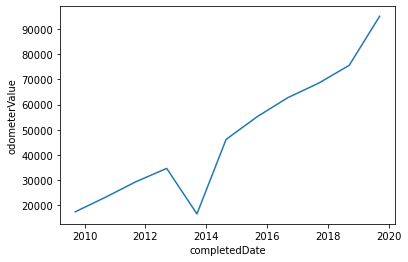

In [160]:
plt.title
sns.lineplot(data = sample_non_monotonic, x = 'completedDate', y='odometerValue')

In [163]:
df[df['registration'] == 'DY56GUH'].sort_values('completedDate', ascending = False)

,completedDate,testResult,expiryDate,odometerValue,odometerUnit,motTestNumber,odometerResultType,registration,jsonPage,registration_1,...,model,firstUsedDate,registrationDate,manufactureDate,engineSize,fuelType,primaryColour,vehicleId,jsonPage_1,year_mot
63,2019-09-12 00:00:00+00:00,PASSED,2020-09-12 00:00:00+00:00,95015,mi,735437182318,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2019
64,2018-09-11 00:00:00+00:00,PASSED,2019-09-12 00:00:00+00:00,75546,mi,915867314703,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2018
65,2017-09-11 00:00:00+00:00,PASSED,2018-09-12 00:00:00+00:00,68501,mi,955322728180,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2017
66,2016-09-05 00:00:00+00:00,PASSED,2017-09-12 00:00:00+00:00,62741,mi,848494284218,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2016
67,2015-09-05 00:00:00+00:00,PASSED,2016-09-12 00:00:00+00:00,55236,mi,668097514215,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2015
68,2014-08-26 00:00:00+00:00,PASSED,2015-09-12 00:00:00+00:00,46181,mi,919428734232,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2014
69,2013-09-10 00:00:00+00:00,PASSED,2014-09-12 00:00:00+00:00,16643,mi,995723353235,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2013
70,2012-09-12 00:00:00+00:00,PASSED,2013-09-12 00:00:00+00:00,34697,mi,579876152277,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2012
71,2011-09-08 00:00:00+00:00,PASSED,2012-09-12 00:00:00+00:00,29400,mi,405311251299,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2011
72,2010-09-10 00:00:00+00:00,PASSED,2011-09-12 00:00:00+00:00,23278,mi,861053650291,READ,DY56GUH,8458.json,DY56GUH,...,CLIO,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,2006-09-12 00:00:00+00:00,1149.0,Petrol,Black,29aQzXCq9UHkboOg8fvfDQ==,8458.json,2010


In [101]:
df.odometerValue[df['registration'] == 'DY56GUH'].is_monotonic

False

In [104]:
sample_monotonic = df[df['registration'] == 'SJ06ZWV']

<AxesSubplot:xlabel='completedDate', ylabel='odometerValue'>

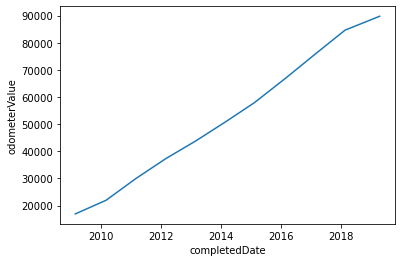

In [105]:
sns.lineplot(data = sample_monotonic, x = 'completedDate', y='odometerValue')

In [111]:
#for some reason .is_monotonic reads from top to bottom. Our data are the other way around...

df.odometerValue[df['registration'] == 'SJ06ZWV'].is_monotonic_decreasing 

True

In [109]:
df.odometerValue[df['registration'] == 'SJ06ZWV']

74    89739
75    84611
76    75960
77    66891
78    57915
79    50895
80    43830
81    37334
82    29970
83    21936
84    16925
Name: odometerValue, dtype: int64

In [115]:
non_mono = []
mono = []
for reg in registrations:
    if df.odometerValue[df['registration'] == reg].is_monotonic_decreasing:
        mono.append(reg)
    else:
        non_mono.append(reg)

In [121]:
mono_vehicles = df[df['registration'].isin(mono)]

<AxesSubplot:xlabel='completedDate', ylabel='odometerValue'>

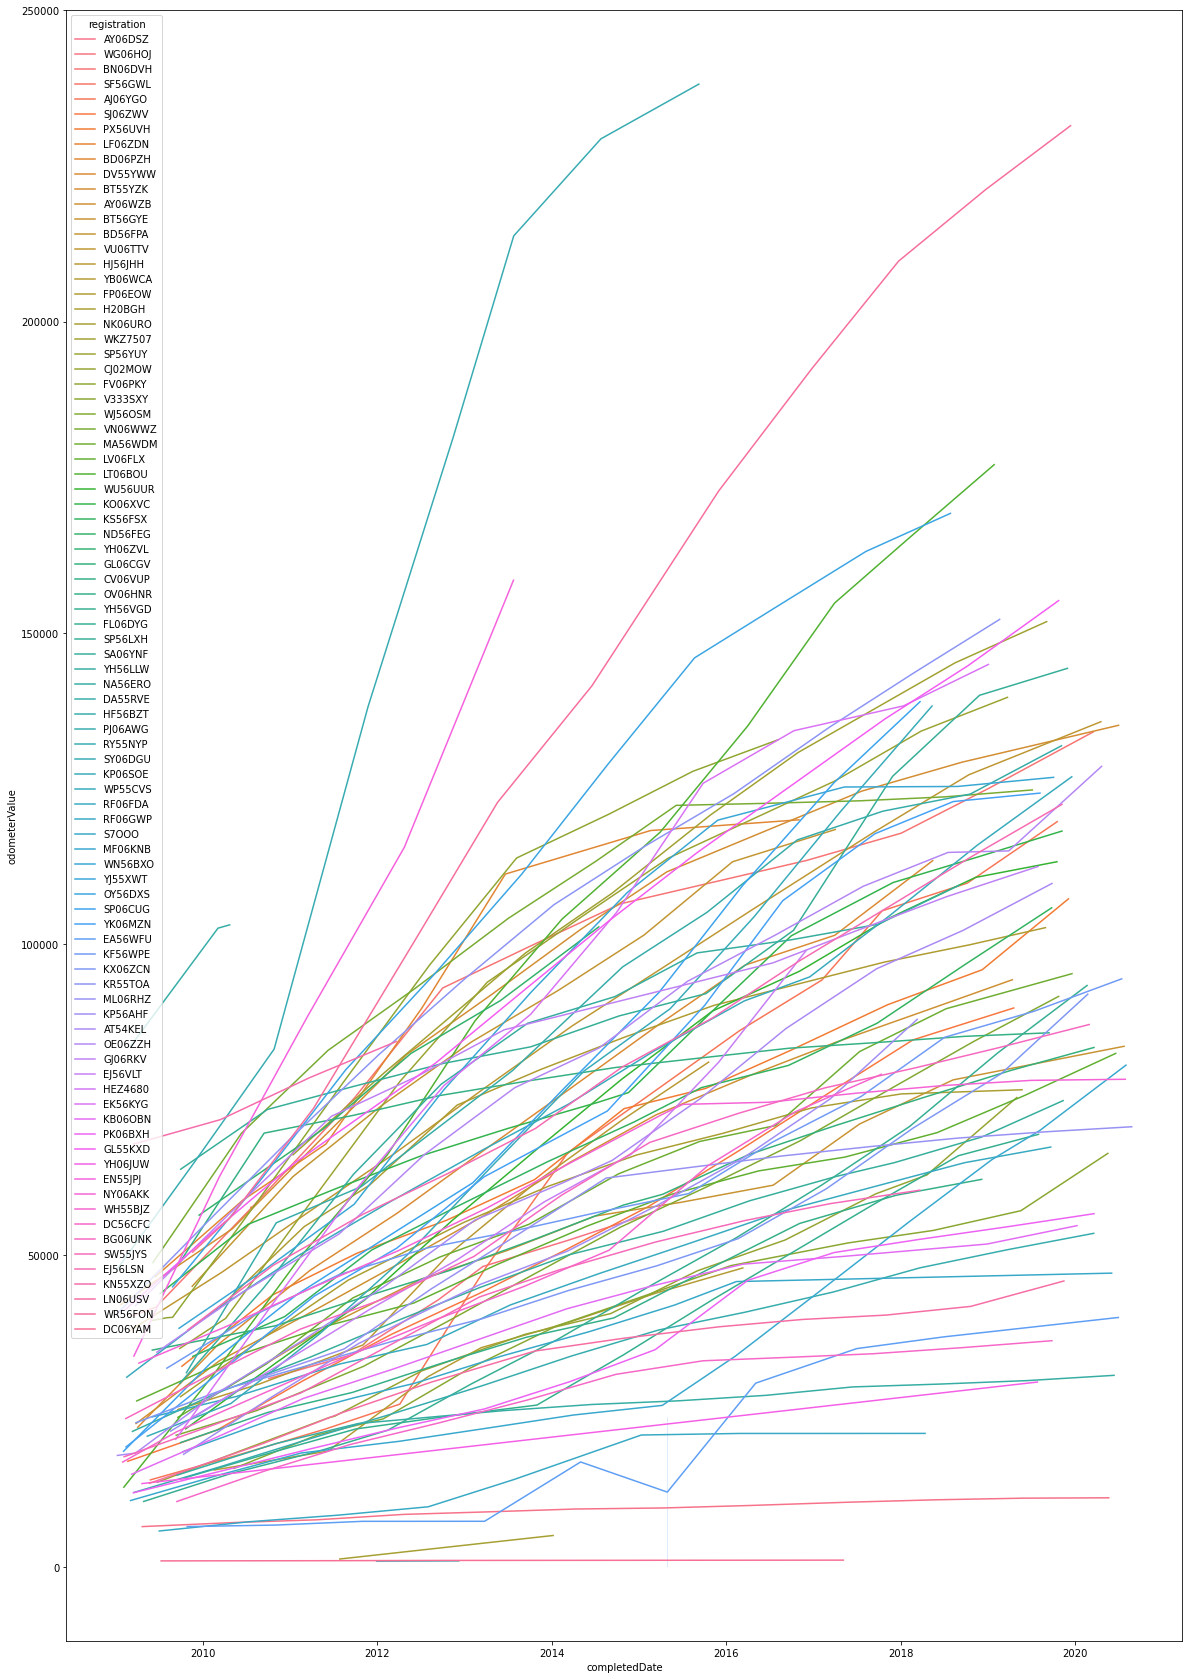

In [118]:
plt.figure(figsize = (20, 30))
sns.lineplot(data = mono_vehicles, x = 'completedDate', y='odometerValue', hue='registration')

In [126]:
petrol_diesel = mono_vehicles.groupby(['fuelType', 'year_mot']).sum()
petrol_diesel.head()

odometerValue  engineSize
fuelType year_mot                           
Diesel   2009            1329487     73098.0
         2010            1730609     64550.0
         2011            1976952     67050.0
         2012            2402371     66049.0
         2013            2881987     68946.0

<AxesSubplot:xlabel='year_mot', ylabel='odometerValue'>

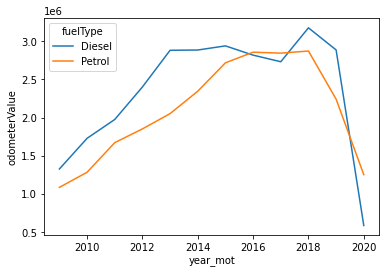

In [127]:
sns.lineplot(data = petrol_diesel, x = 'year_mot', y='odometerValue', hue='fuelType')

In [131]:
makes_mileage = mono_vehicles.groupby(['make', 'year_mot']).mean()

In [132]:
makes_mileage.head()

odometerValue   engineSize
make year_mot                            
AUDI 2009       32666.000000  1985.000000
     2010       40384.000000  1985.000000
     2011       48655.500000  1985.000000
     2012       64663.333333  1985.333333
     2013       67237.000000  1985.000000

<AxesSubplot:xlabel='year_mot', ylabel='odometerValue'>

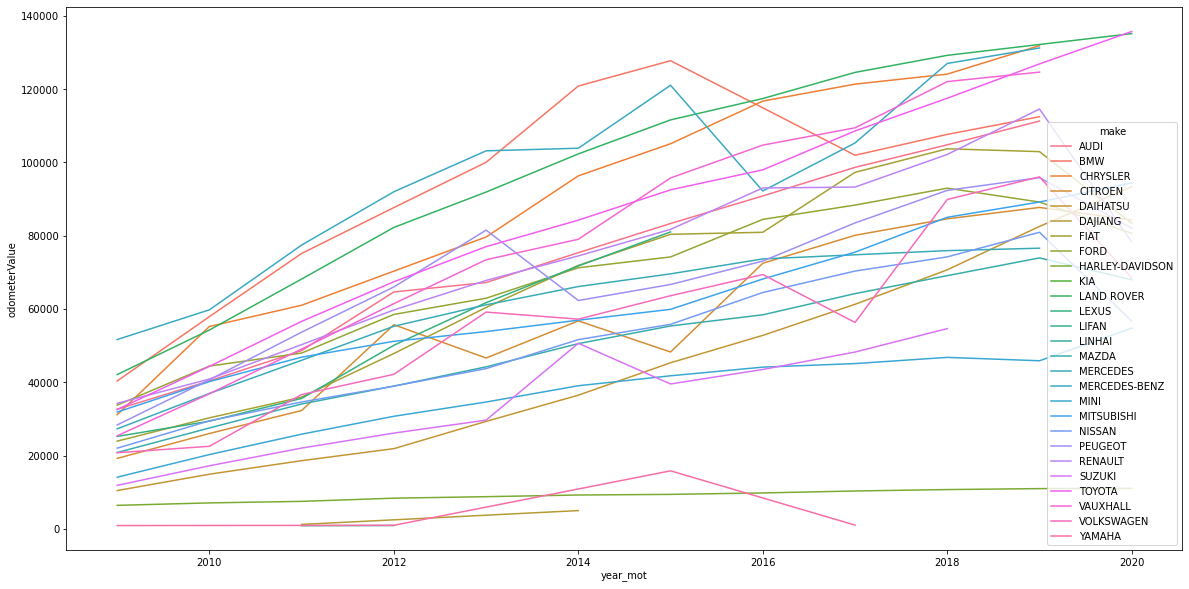

In [148]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = makes_mileage, x='year_mot', y='odometerValue', hue = 'make')

In [152]:
fords = mono_vehicles[mono_vehicles['make'] == 'FORD']
fords.head()

,completedDate,testResult,expiryDate,odometerValue,odometerUnit,motTestNumber,odometerResultType,registration,jsonPage,registration_1,...,model,firstUsedDate,registrationDate,manufactureDate,engineSize,fuelType,primaryColour,vehicleId,jsonPage_1,year_mot
29,2020-03-16 00:00:00+00:00,PASSED,2021-03-15 00:00:00+00:00,134083,mi,401571462082,READ,BN06DVH,6892.json,BN06DVH,...,FIESTA,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,1399.0,Diesel,White,Dv4kQRFCJy1eM192rIYZMw==,6892.json,2020
30,2019-01-04 00:00:00+00:00,PASSED,2020-01-03 00:00:00+00:00,125027,mi,888228980159,READ,BN06DVH,6892.json,BN06DVH,...,FIESTA,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,1399.0,Diesel,White,Dv4kQRFCJy1eM192rIYZMw==,6892.json,2019
31,2018-01-02 00:00:00+00:00,PASSED,2019-01-01 00:00:00+00:00,117817,mi,469604281923,READ,BN06DVH,6892.json,BN06DVH,...,FIESTA,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,1399.0,Diesel,White,Dv4kQRFCJy1eM192rIYZMw==,6892.json,2018
32,2016-12-02 00:00:00+00:00,PASSED,2017-12-01 00:00:00+00:00,113438,mi,333290234649,READ,BN06DVH,6892.json,BN06DVH,...,FIESTA,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,1399.0,Diesel,White,Dv4kQRFCJy1eM192rIYZMw==,6892.json,2016
33,2014-10-16 00:00:00+00:00,PASSED,2015-10-15 00:00:00+00:00,106484,mi,767759984257,READ,BN06DVH,6892.json,BN06DVH,...,FIESTA,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,2006-03-09 00:00:00+00:00,1399.0,Diesel,White,Dv4kQRFCJy1eM192rIYZMw==,6892.json,2014


In [153]:
fords_pd = fords.groupby(['fuelType', 'year_mot']).sum()
fords_pd.head()

odometerValue  engineSize
fuelType year_mot                           
Diesel   2009             430728     20958.0
         2010             494406     16957.0
         2011             505200     17561.0
         2012             604733     17561.0
         2013             697662     17561.0

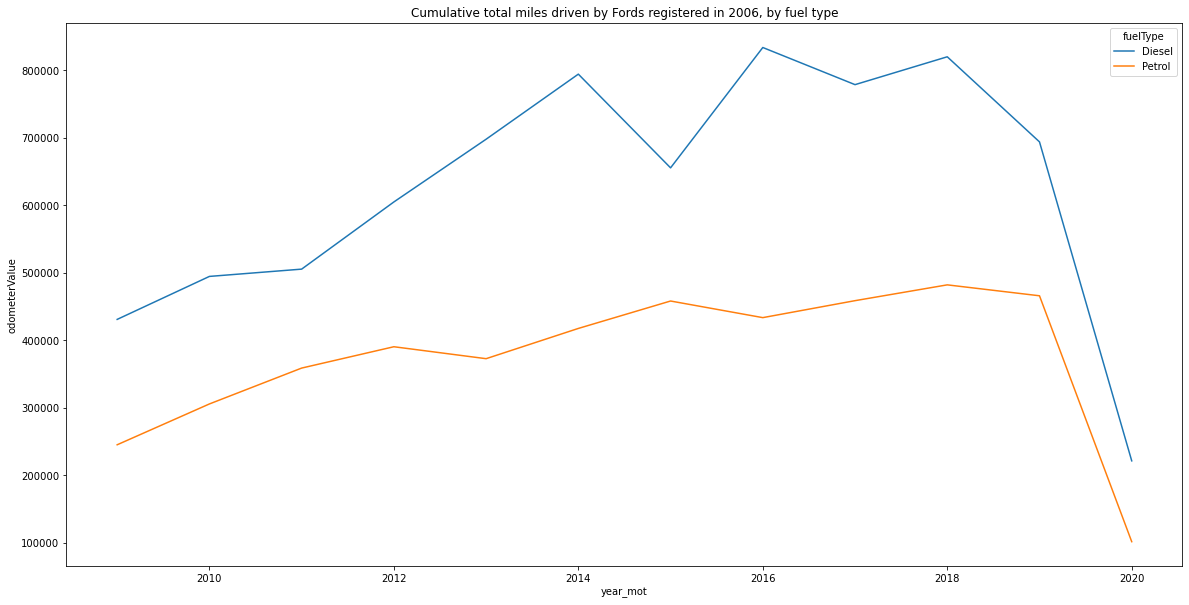

In [155]:
plt.figure(figsize=(20, 10))
plt.title('Cumulative total miles driven by Fords registered in 2006, by fuel type')
sns.lineplot(data = fords_pd, x='year_mot', y='odometerValue', hue='fuelType')
plt.savefig('fords_fueltype.png')

In [144]:
fords_pd

odometerValue  engineSize
fuelType year_mot                           
Diesel   2009             430728     20958.0
         2010             494406     16957.0
         2011             505200     17561.0
         2012             604733     17561.0
         2013             697662     17561.0
         2014             794094     17561.0
         2015             655254     13964.0
         2016             833557     15363.0
         2017             778526     13964.0
         2018             819797     12961.0
         2019             693712     10963.0
         2020             221166      3152.0
Petrol   2009             244975     13148.0
         2010             305462     13205.0
         2011             358604     13205.0
         2012             390218     11817.0
         2013             372525     11609.0
         2014             417336     11609.0
         2015             457966     11609.0
         2016             433339     10221.0
         2017             458480     10310.0
         2018             481897     10310.0
         2019             465714     10310.0
         2020             101394      3387.0